#### this notebook did it for PILA:
http://localhost:8805/notebooks/notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/calculate_JS_bcs_using_AOU.ipynb

### 1 find surface intrusion at JS with PACELLA method


### 2 locate at-depth intrusion at 26.1 at JDF

### plot linear relationship of means intrusion vs salinity.

### get intrusion from salinity



In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pandas as pd
import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import pickle
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

#from matplotlib import reload
import arrow
import gsw
import time

%matplotlib inline

plt.rcParams.update({'font.size': 20,
                     'xtick.labelsize' : 20,
                     'ytick.labelsize' : 20})

In [2]:
#LO_AOUmethod_stoicCO_diseq_allup_y2015m12d29_preind_DIC.nc
start ='2017-01-01'
end ='2017-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)


newCAR_DIC = np.zeros([365,40,950])
newCAR_sigma0 = np.zeros([365,40,950])
for i in range(0,365):

    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'

#     if i%60 == 0:
        #print(ymd)
    
    newCAR =  nc.Dataset(f'./JdF_future_DIC/stitched/LO_TY_2050_scen_2_4pt5_{ymd}_DIC_nosurfnodeep.nc')
    #print(newCAR['preindustrial_DIC'])
    #newCAR = nc.Dataset(f'./preind_DIC/LO_AOUmethod_stoicCO_diseq_allup_{ymd}_preind_DIC.nc')
   # print(newCAR)
    #newCAR_DIC[i,:,:] = newCAR['preindustrial_DIC']['preind_dic'][:,:] 
    newCAR_sigma0[i,:,:] = newCAR['preindustrial_DIC']['sigma0'][:,:] 
    newCAR_DIC[i,:,:] = newCAR['preindustrial_DIC']['final_target_DIC'][:,:] 
    newCAR.close()

In [3]:
#retreive present day DIC and salinity
presday_DIC = np.zeros([365,40,950])
presday_TA = np.zeros([365,40,950])
presday_sal = np.zeros([365,40,950])

for i in range(0,365):

    tdate = arrow_array[i][0]
    #ymd = tdate.format('YYYY')
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}.nc'

#     if i%60 == 0:
#         #print(ymd)
    presday = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}')
    presday_DIC[i,:,:] = presday['DIC'][0,:,0,:]
    presday_TA[i,:,:] = presday['TA'][0,:,0,:]
    presday_sal[i,:,:] = presday['vosaline'][0,:,0,:]
    presday.close()



In [6]:
print(np.max(newCAR_DIC))

newCAR_DIC[newCAR_DIC>3000] = np.nan

9999.0


In [17]:
### monthly means
mean_sal_deep_EM = np.zeros([12])
mean_intr_deep_EM = np.zeros([12])
for i in range(0,12):
#presday_sal 
    DIC_intrusion_mon = DIC_intrusion[i*30:(i+1)*30,:,:]
    sig26 = (newCAR_sigma0[i*30:(i+1)*30,:,:] >26.0) & (newCAR_sigma0[i*30:(i+1)*30,:,:] < 26.1)
    presday_sal_mon = presday_sal[i*30:(i+1)*30,:,:]
    
    mean_intr_deep_EM[i] = np.nanmean(DIC_intrusion_mon[sig26])
    mean_sal_deep_EM[i] = np.nanmean(presday_sal_mon[sig26])

22.882837720044055
28.05065373708155
nan


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Text(0, 0.5, 'DIC intrusion umol/L')

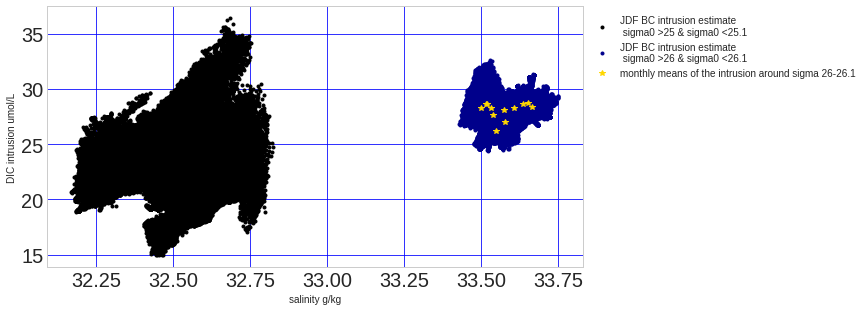

In [34]:
np.shape(newCAR_sigma0)
DIC_intrusion = newCAR_DIC-presday_DIC
#presday_sal 
sig25 = (newCAR_sigma0 >25.0) & (newCAR_sigma0 < 25.1)
print(np.nanmean(DIC_intrusion[sig25]))
sig26 = (newCAR_sigma0 >26.0) & (newCAR_sigma0 < 26.1)
print(np.nanmean(DIC_intrusion[sig26]))
sig27 = (newCAR_sigma0 >27.0) & (newCAR_sigma0 < 27.1)
print(np.nanmean(DIC_intrusion[sig27]))


fact = 0.8
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), edgecolor='k')
#axs = axs.ravel()

#plt.xticks(rotation=70)
axs.plot(presday_sal[sig25],DIC_intrusion[sig25],
            color = 'k', marker = '.', linestyle = '', \
            label = 'JDF BC intrusion estimate \n sigma0 >25 & sigma0 <25.1' )
axs.plot(presday_sal[sig26],DIC_intrusion[sig26],
            color = 'darkblue', marker = '.', linestyle = '', \
            label = 'JDF BC intrusion estimate \n sigma0 >26 & sigma0 <26.1' )
axs.plot(mean_sal_deep_EM,mean_intr_deep_EM, color = 'gold',\
         marker = '*',linestyle = '',\
         label = 'monthly means of the intrusion around sigma 26-26.1')

#tsal_r_psu = tsal_r*35/35.16504

axs.grid(b=True, which='major', color='b', linestyle='-')
axs.legend(bbox_to_anchor = [1,1])
axs.set_xlabel('salinity g/kg')
axs.set_ylabel('DIC intrusion umol/L')


In [43]:

import BC_helper_methods as hm
import importlib
importlib.reload(hm)

<module 'BC_helper_methods' from '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/RIVER_PAPER/future_pilot/BC_helper_methods.py'>

30.866781
31.67721


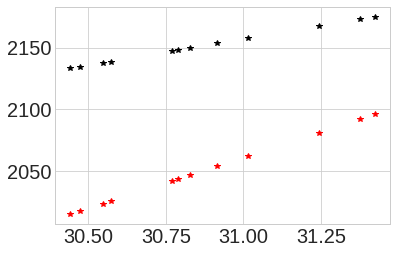

In [44]:
presday_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
presday_JS_bc_sal = presday_JS_bc['vosaline']
presday_JS_bc_temp = presday_JS_bc['votemper']
presday_JS_bc_DIC = presday_JS_bc['DIC']
presday_JS_bc_TA = presday_JS_bc['TA']
print(np.nanmean(presday_JS_bc_sal[:,0,:,:]))
print(np.nanmean(presday_JS_bc_sal[:,39,:,:]))

import gsw

## basically 6 months 40 values

# print(np.shape(presday_JS_bc_DIC))
# print(presday_JS_bc_DIC[6,4,:,:])

surface_sal_baby = presday_JS_bc_sal[:,0,0,0]
surface_DIC_baby = presday_JS_bc_DIC[:,0,0,0]
surface_TA_baby = presday_JS_bc_TA[:,0,0,0]
surface_temp_baby = presday_JS_bc_temp[:,0,0,0]

plt.plot(surface_sal_baby,surface_DIC_baby,'r*')
plt.plot(surface_sal_baby,surface_TA_baby,'k*')



In [39]:
def Pacella_TCO2(obs_year,target_year, scen, tsal, ttemp, dic, ta, verbose = False):
    

    watermass_witnessed_co2_obs = int(hm.co2_from_year_pointmeas(scen,obs_year))
    watermass_witnessed_co2_target = int(hm.co2_from_year_pointmeas(scen,target_year))
    
    if verbose:
        print(f'obs year: {obs_year}')
        print(f'obs year co2: {watermass_witnessed_co2_obs}')
        print(f'target year: {target_year}')
        print(f'target year co2: {watermass_witnessed_co2_target}')
    
    DIC_obs_eq = hm.find_DIC_corresp_to_pco2(tsal, ttemp, watermass_witnessed_co2_obs, ta, 1, 0)
    del_TCO2 = dic - DIC_obs_eq
    
    DIC_target_eq = hm.find_DIC_corresp_to_pco2(tsal, ttemp, watermass_witnessed_co2_target, ta, 1, 0)
    DIC_target_final = DIC_target_eq + del_TCO2
    DIC_intrusion = DIC_target_final-dic
    #DIC_obs_real = hm.find_DIC_corresp_to_pco2(tsal, ttemp, watermass_witnessed_co2_obs, tta, 1, 0)
    if verbose:
        print('')
        #print(del_TCO2)
        print(f'this is what DIC would be at equilibrium (obs): {DIC_obs_eq}')
        print(f'this is what DIC actually is (obs): {dic}')
        print(f'this is the del TCO2: {del_TCO2}')
        print(f'this is what DIC would be at equilibrium (target): {DIC_target_eq}')
        print(f'this is what DIC actually should/would be (target): {DIC_target_eq + del_TCO2}')
        print(f'this is the intrusion: {DIC_intrusion}')
        
    #print(f'this is the intrusion: {DIC_intrusion}')
    return DIC_intrusion

In [45]:

# surface_sal_baby = presday_JS_bc_sal[:,0,0,0]
# surface_DIC_baby = presday_JS_bc_DIC[:,0,0,0]
# surface_TA_baby = presday_JS_bc_TA[:,0,0,0]
# surface_temp_baby = presday_JS_bc_temp[:,0,0,0]

intrusion_baby = np.zeros_like(surface_sal_baby)

for i in range(0,12):
    intrusion_baby[i] = Pacella_TCO2(2017, 2050, '2_4pt5', \
                                surface_sal_baby[i], surface_temp_baby[i], \
                                     surface_DIC_baby[i], surface_TA_baby[i], verbose = True)
    print('walrus')

obs year: 2017
obs year co2: 407
target year: 2050
target year co2: 509

this is what DIC would be at equilibrium (obs): 2010.659999999608
this is what DIC actually is (obs): 2025.777587890625
this is the del TCO2: 15.11758789101691
this is what DIC would be at equilibrium (target): 2040.3599999995995
this is what DIC actually should/would be (target): 2055.4775878906166
this is the intrusion: 29.699999999991633
walrus
obs year: 2017
obs year co2: 407
target year: 2050
target year co2: 509

this is what DIC would be at equilibrium (obs): 2006.5199999996094
this is what DIC actually is (obs): 2015.063232421875
this is the del TCO2: 8.543232422265646
this is what DIC would be at equilibrium (target): 2035.8599999996009
this is what DIC actually should/would be (target): 2044.4032324218665
this is the intrusion: 29.339999999991505
walrus
obs year: 2017
obs year co2: 407
target year: 2050
target year co2: 509

this is what DIC would be at equilibrium (obs): 2017.8599999996059
this is what 

30.866781
31.67721


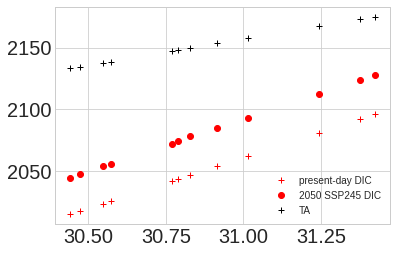

In [49]:
presday_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
presday_JS_bc_sal = presday_JS_bc['vosaline']
presday_JS_bc_temp = presday_JS_bc['votemper']
presday_JS_bc_DIC = presday_JS_bc['DIC']
presday_JS_bc_TA = presday_JS_bc['TA']
print(np.nanmean(presday_JS_bc_sal[:,0,:,:]))
print(np.nanmean(presday_JS_bc_sal[:,39,:,:]))

import gsw

## basically 6 months 40 values

# print(np.shape(presday_JS_bc_DIC))
# print(presday_JS_bc_DIC[6,4,:,:])

surface_sal_baby = presday_JS_bc_sal[:,0,0,0]
surface_DIC_baby = presday_JS_bc_DIC[:,0,0,0]
surface_TA_baby = presday_JS_bc_TA[:,0,0,0]
surface_temp_baby = presday_JS_bc_temp[:,0,0,0]

plt.plot(surface_sal_baby,surface_DIC_baby,'r+', label = 'present-day DIC')
plt.plot(surface_sal_baby,surface_DIC_baby+intrusion_baby,'ro', label = '2050 SSP245 DIC')
plt.plot(surface_sal_baby,surface_TA_baby,'k+', label = 'TA')
plt.legend()


22.882837720044055
28.05065373708155
nan


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Text(0, 0.5, 'DIC intrusion umol/L')

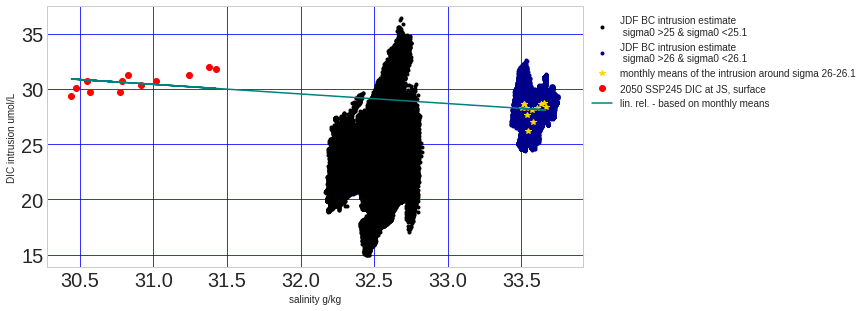

In [52]:
np.shape(newCAR_sigma0)
DIC_intrusion = newCAR_DIC-presday_DIC
#presday_sal 
sig25 = (newCAR_sigma0 >25.0) & (newCAR_sigma0 < 25.1)
print(np.nanmean(DIC_intrusion[sig25]))
sig26 = (newCAR_sigma0 >26.0) & (newCAR_sigma0 < 26.1)
print(np.nanmean(DIC_intrusion[sig26]))
sig27 = (newCAR_sigma0 >27.0) & (newCAR_sigma0 < 27.1)
print(np.nanmean(DIC_intrusion[sig27]))


fact = 0.8
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), edgecolor='k')
#axs = axs.ravel()

#plt.xticks(rotation=70)
axs.plot(presday_sal[sig25],DIC_intrusion[sig25],
            color = 'k', marker = '.', linestyle = '', \
            label = 'JDF BC intrusion estimate \n sigma0 >25 & sigma0 <25.1' )
axs.plot(presday_sal[sig26],DIC_intrusion[sig26],
            color = 'darkblue', marker = '.', linestyle = '', \
            label = 'JDF BC intrusion estimate \n sigma0 >26 & sigma0 <26.1' )
axs.plot(mean_sal_deep_EM,mean_intr_deep_EM, color = 'gold',\
         marker = '*',linestyle = '',\
         label = 'monthly means of the intrusion around sigma 26-26.1')
plt.plot(surface_sal_baby,intrusion_baby,'ro', label = '2050 SSP245 DIC at JS, surface')


intr_concat2 = np.concatenate((mean_intr_deep_EM,intrusion_baby), axis=0)
sal_concat2 = np.concatenate((mean_sal_deep_EM,surface_sal_baby), axis=0)
m2, b2 = np.polyfit(sal_concat2, intr_concat2, 1)


axs.plot(sal_concat2, m2*sal_concat2 + b2, linestyle = '-', color = 'teal', label = 'lin. rel. - based on monthly means')



#tsal_r_psu = tsal_r*35/35.16504

axs.grid(b=True, which='major', color='b', linestyle='-')
axs.legend(bbox_to_anchor = [1,1])
axs.set_xlabel('salinity g/kg')
axs.set_ylabel('DIC intrusion umol/L')


In [56]:
#http://localhost:8807/notebooks/notebooks/
#PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/
#JS_dic_alg_DIC_int_vs_salinity_and_make_JS_BCs.ipynb

intr2 = m2*sal_concat2 + b2

presday_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
presday_JS_bc_sal = presday_JS_bc['vosaline']

car50_intr = m2*presday_JS_bc_sal + b2
print(np.max(car50_intr))
print(np.min(car50_intr))

car50_DIC = car50_intr + presday_JS_bc_DIC 

30.922537
29.415043


In [57]:


#input file
test_LO = nc.Dataset(f'//data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
#print(test_LO)
#input file for preindustrial DIC
dsin = test_LO 
#output filename
ncname = f'./Dosser_north_TEOS10_CAR50_SSP245_JS.nc'

dsout = nc.Dataset(ncname, "w", format="NETCDF4")
#Copy dimensions
for dname, the_dim in dsin.dimensions.items():
    #print(dname)
    #print(len(the_dim))
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)

# Copy variables
for v_name, varin in dsin.variables.items():
    #print(v_name)
    #if (v_name != 'DIC'):
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
    # Copy variable attributes
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})

    outVar[:] = varin[:]

# copy new DIC variables
dsout['DIC'][:] = car50_DIC

dsout.close()